# Load DFT data into a more manageable format

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase.db import connect
import sys
import os

In [2]:
# Attach Jacks formic acid data
formic_acid_data_path = "../Experiments/AgAuCuPdPt_data/1_databases/relaxed/"
#sys.path.append()

In [3]:
os.listdir(formic_acid_data_path)

['single_element_H_out.db',
 'HCOOH_O_adsorbed_out.db',
 'H_out.db',
 '.DS_Store',
 'COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_COOH_COH_adsorbed_out.db',
 'COOH_O_adsorbed_out.db',
 'CO_out.db',
 'single_element_COOH_H_CO_adsorbed_out.db',
 'single_element_COOH_C_adsorbed_out.db',
 'single_element_COOH_CO_adsorbed_out.db',
 'single_element_CO_out.db',
 'split_databases.py',
 'single_elements_COOH_CO_adsorbed_out.db',
 'molecules_out.db',
 'single_element_COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_slabs_out.db',
 'single_elements_COOH_COH_adsorbed_out.db',
 'single_element_COOH_H_CO_and_H2O_like_out.db',
 'single_element_HCOOH_O_adsorbed_out.db',
 'slabs_out.db',
 'single_element_COOH_O_adsorbed_out.db',
 'single_element_COOH_H_COH_adsorbed_out.db',
 'COOH_CO_adsorbed_out.db',
 'COOH_H_on_C_OO_adsorbed_out.db',
 'COOH_C_adsorbed_out.db',
 'COOH_COH_adsorbed_out.db']

### Sort through data

In [4]:
single_element_dbs = []
HEA_dbs = []

for filename in os.listdir(formic_acid_data_path):
    if filename[-3:] == ".db":
        if filename[0:14] == "single_element":
            single_element_dbs.append(filename)
        if filename[0] == "H" or filename[0] == "C":
            HEA_dbs.append(filename)

In [46]:
os.listdir(formic_acid_data_path)

['single_element_H_out.db',
 'HCOOH_O_adsorbed_out.db',
 'H_out.db',
 '.DS_Store',
 'COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_COOH_COH_adsorbed_out.db',
 'COOH_O_adsorbed_out.db',
 'CO_out.db',
 'single_element_COOH_H_CO_adsorbed_out.db',
 'single_element_COOH_C_adsorbed_out.db',
 'single_element_COOH_CO_adsorbed_out.db',
 'single_element_CO_out.db',
 'split_databases.py',
 'single_elements_COOH_CO_adsorbed_out.db',
 'molecules_out.db',
 'single_element_COOH_H_on_O_OO_adsorbed_out.db',
 'single_element_slabs_out.db',
 'single_elements_COOH_COH_adsorbed_out.db',
 'single_element_COOH_H_CO_and_H2O_like_out.db',
 'single_element_HCOOH_O_adsorbed_out.db',
 'slabs_out.db',
 'single_element_COOH_O_adsorbed_out.db',
 'single_element_COOH_H_COH_adsorbed_out.db',
 'COOH_CO_adsorbed_out.db',
 'COOH_H_on_C_OO_adsorbed_out.db',
 'COOH_C_adsorbed_out.db',
 'COOH_COH_adsorbed_out.db']

In [5]:
print(f"Single element: \n{single_element_dbs}\n")
print(f"HEA: \n{HEA_dbs}")

Single element: 
['single_element_H_out.db', 'single_element_COOH_COH_adsorbed_out.db', 'single_element_COOH_H_CO_adsorbed_out.db', 'single_element_COOH_C_adsorbed_out.db', 'single_element_COOH_CO_adsorbed_out.db', 'single_element_CO_out.db', 'single_elements_COOH_CO_adsorbed_out.db', 'single_element_COOH_H_on_O_OO_adsorbed_out.db', 'single_element_slabs_out.db', 'single_elements_COOH_COH_adsorbed_out.db', 'single_element_COOH_H_CO_and_H2O_like_out.db', 'single_element_HCOOH_O_adsorbed_out.db', 'single_element_COOH_O_adsorbed_out.db', 'single_element_COOH_H_COH_adsorbed_out.db']

HEA: 
['HCOOH_O_adsorbed_out.db', 'H_out.db', 'COOH_H_on_O_OO_adsorbed_out.db', 'COOH_O_adsorbed_out.db', 'CO_out.db', 'COOH_CO_adsorbed_out.db', 'COOH_H_on_C_OO_adsorbed_out.db', 'COOH_C_adsorbed_out.db', 'COOH_COH_adsorbed_out.db']


### Extract energy

In [34]:
def fetch_energies(db_folder, filename):
    Dbong = connect(db_folder + filename)
    energy_list = []
    for row in Dbong.select("energy"):
        energy_list.append(row.energy)
    return np.array(energy_list)

In [35]:
def fetch_energies_database(db_folder, filename_list):
    energies_dict= {}
    for filename in filename_list:
        energies_dict[filename] = fetch_energies(db_folder, filename)
    return energies_dict

In [36]:
def fetch_molecule_energies(db_folder):
    Dbong = connect(db_folder + "molecules_out.db")
    molecules_dict = {}
    for row in Dbong.select("energy"):
        molecules_dict[row.formula] = row.energy
    return molecules_dict

In [59]:
# Load the slabs_out.db energies and make 9 copies of each. Then it'll match up with the other data
def fetch_slab_energies(db_folder):
    Dbong = connect(db_folder + "slabs_out.db")
    energy_list = []
    for row in Dbong.select("energy"):
        energy_list.append(9*[row.energy])
    return np.array(energy_list).flatten()

### Loading energies etc.

In [60]:
# Single element energies
SE_energies = fetch_energies_database(db_folder = formic_acid_data_path, filename_list = single_element_dbs)
# High entropy alloy energies
HEA_energies = fetch_energies_database(db_folder = formic_acid_data_path, filename_list = HEA_dbs) #I should remove .db, so it's more readable
# Molecule energies
molecules_dict = fetch_molecule_energies(formic_acid_data_path)
# Slab energies
slab_energies = fetch_slab_energies(db_folder = formic_acid_data_path)

In [61]:
slab_energies

array([-153.62025441, -153.62025441, -153.62025441, -153.62025441,
       -153.62025441, -153.62025441, -153.62025441, -153.62025441,
       -153.62025441, -141.5953381 , -141.5953381 , -141.5953381 ,
       -141.5953381 , -141.5953381 , -141.5953381 , -141.5953381 ,
       -141.5953381 , -141.5953381 , -145.56813085, -145.56813085,
       -145.56813085, -145.56813085, -145.56813085, -145.56813085,
       -145.56813085, -145.56813085, -145.56813085, -143.85225228,
       -143.85225228, -143.85225228, -143.85225228, -143.85225228,
       -143.85225228, -143.85225228, -143.85225228, -143.85225228,
       -143.30256355, -143.30256355, -143.30256355, -143.30256355,
       -143.30256355, -143.30256355, -143.30256355, -143.30256355,
       -143.30256355, -133.57214067, -133.57214067, -133.57214067,
       -133.57214067, -133.57214067, -133.57214067, -133.57214067,
       -133.57214067, -133.57214067, -152.61533585, -152.61533585,
       -152.61533585, -152.61533585, -152.61533585, -152.61533

In [45]:
molecules_dict

{'CO': -12.848598765234707,
 'CO2': -19.15168636258064,
 'CH2O2': -25.7548327798152,
 'C2H4O2': -41.95993780269195,
 'H2': -6.67878491734772,
 'H2O': -12.225511685485456,
 'CH2O': -19.92286258910958,
 'CH4O': -27.652189372849637,
 'C2H6O': -43.67355392866396,
 'C2H2O2': -32.92328015484662,
 'C2H2O4': -44.117581976029946}

In [42]:
SE_energies

{'single_element_H_out.db': array([-102.61061554, -113.6327799 , -133.80902161, -140.06417094,
        -252.73661979]),
 'single_element_COOH_COH_adsorbed_out.db': array([-120.98665571, -132.12586765, -152.05299596, -158.44002628,
        -271.4908476 ]),
 'single_element_COOH_H_CO_adsorbed_out.db': array([-123.91563313, -135.14382218, -155.37067495, -162.09692652,
        -275.05489166]),
 'single_element_COOH_C_adsorbed_out.db': array([-121.04141749, -132.18512944, -152.0875609 , -158.46604361,
        -271.5086386 ]),
 'single_element_COOH_CO_adsorbed_out.db': array([-120.99567634, -132.16743466, -152.17241484, -158.49624053,
        -271.47092801]),
 'single_element_CO_out.db': array([-112.38959372, -123.43868564, -143.65685251, -150.26074774,
        -263.30312496]),
 'single_elements_COOH_CO_adsorbed_out.db': array([], dtype=float64),
 'single_element_COOH_H_on_O_OO_adsorbed_out.db': array([-120.21625336, -130.97245054, -151.14277063, -157.00681323,
        -269.67647799]),
 'sin

In [50]:
HEA_energies.keys()

dict_keys(['HCOOH_O_adsorbed_out.db', 'H_out.db', 'COOH_H_on_O_OO_adsorbed_out.db', 'COOH_O_adsorbed_out.db', 'CO_out.db', 'COOH_CO_adsorbed_out.db', 'COOH_H_on_C_OO_adsorbed_out.db', 'COOH_C_adsorbed_out.db', 'COOH_COH_adsorbed_out.db'])

## Correcting DFT energies

### Approximation of Gibbs free energy parameters (From Chan et. al.)

In [8]:
# I'll probably need a lot of dictionaries for the different parameters

# Free (eV)
CO2   = {"ZPE": 0.31, "CpdT": 0.10, "minusTS": -0.66}
CO    = {"ZPE": 0.13, "CpdT": 0.09, "minusTS": -0.61}
H2    = {"ZPE": 0.28, "CpdT": 0.09, "minusTS": -0.40, "G": 0}
H2O   = {"ZPE": 0.57, "CpdT": 0.10, "minusTS": -0.67}
HCOOH = {"ZPE": 0.90, "CpdT": 0.11, "minusTS": -0.99}

# *Bound to the surface (eV)
bound_CO   = {"ZPE": 0.19, "CpdT": 0.08, "minusTS": -0.16}
bound_OH   = {"ZPE": 0.36, "CpdT": 0.05, "minusTS": -0.08}
bound_OCHO = {"ZPE": 0.62, "CpdT": 0.11, "minusTS": -0.24}
bound_O    = {"ZPE": 0.07, "CpdT": 0.03, "minusTS": -0.04}
bound_COOH = {"ZPE": 0.62, "CpdT": 0.10, "minusTS": -0.19}
bound_H    = {"ZPE": 0.23, "CpdT": 0.01, "minusTS": -0.01}

# Approximation Factors (FA)
AF = {"CO2": CO2, "CO": CO, "H2": H2, "H2O": H2O, "HCOOH": HCOOH, \
                         "bound_CO": bound_CO, "bound_OH": bound_OH, "bound_OCHO": bound_OCHO, \
                        "bound_O": bound_O, "bound_COOH": bound_COOH, "bound_H": bound_H}

In [10]:
# Function, that turns DFT-E into G
def App_gibbs(molecule, DFT_energy, AF): # Jeg burde proppe numpy arrays ind her, så den tager hele listen på én gang
    Gibbs = DFT_energy + AF[molecule]["ZPE"] + AF[molecule]["CpdT"] + AF[molecule]["minusTS"] #TJEK I need to add the solvent thing here. Ask Jack where I can find it
    return Gibbs

In [11]:
# Single usage - is runs
App_gibbs("bound_COOH", HEA_energies['COOH_O_adsorbed_out.db'][0], AF)

NameError: name 'HEA_energies' is not defined

In [ ]:
# Function, that turns G's into DeltaG
def DeltaGibbs(U): #How do I generalize this for different reactions? Maybe there is a different number of reactions
    DeltaG = 
    return DeltaG

In [ ]:
## Find some kind of system, where I can semi-easily implement other reactions

def binding_energy_reaction(reactants, products, n_HE, U, AF):
    
    DeltaG += App_gibbs(products.keys(), products.values())
    
    
    DeltaG += n_HE * (1/2*molecules_dict["H2"] - 1*U) # I subbed e for 1 because we want the energy in eV, not Joule
    
    
    
    return DeltaG

In [62]:
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}

reaction = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing

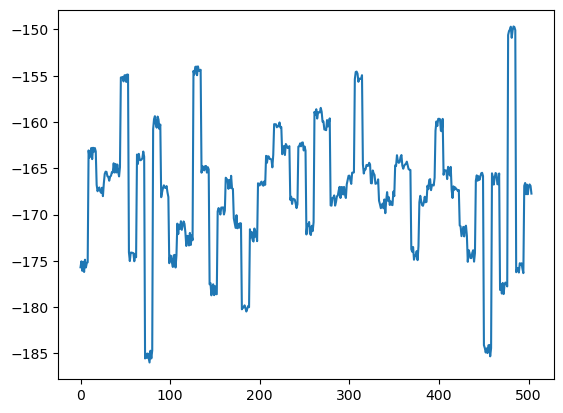

In [52]:
plt.plot(HEA_energies["COOH_C_adsorbed_out.db"])

In [87]:
AF["H2"]["G"]

0

### Loading binding energies of the reaction of adsorbing formic acid
$$ HCOOH (l) + * \rightleftharpoons *COOH + (H^+ e^-) $$

In [ ]:


reactants = []

### Plotting energies (No corrections)

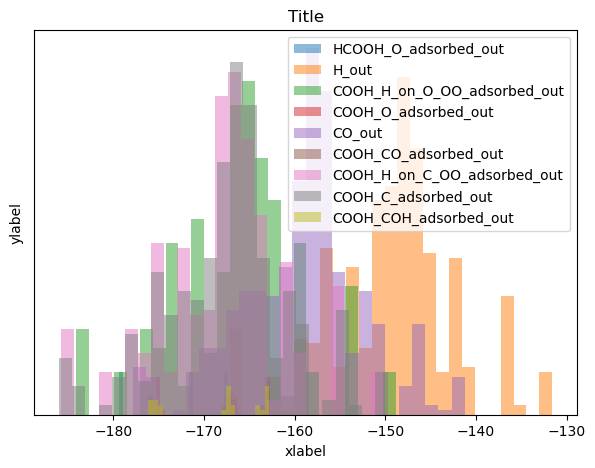

In [62]:
def plot_something(energy_dict):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    for key in energy_dict.keys():
        if key  
        ax.hist(energy_dict[key], label = f"{key}"[:-3], bins=25, alpha = 0.5)
    
    ax.set_title(f"Title")
    ax.set_yticks([])
    ax.set_ylabel("ylabel")
    ax.set_xlabel("xlabel")
    ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None
    
plot_something(HEA_energies)

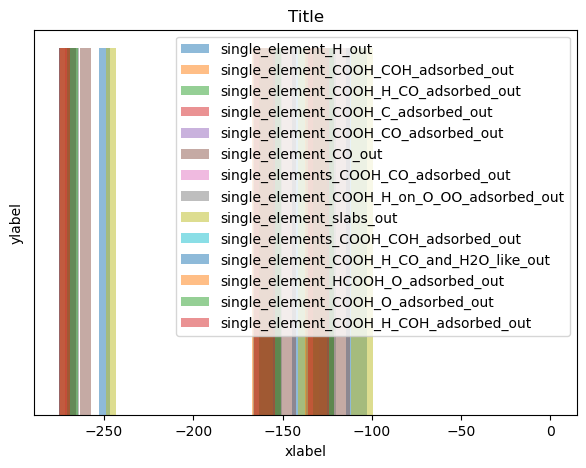

In [63]:
plot_something(SE_energies)

In [52]:
HEA_energies.keys()

dict_keys(['HCOOH_O_adsorbed_out.db', 'H_out.db', 'COOH_H_on_O_OO_adsorbed_out.db', 'COOH_O_adsorbed_out.db', 'CO_out.db', 'COOH_CO_adsorbed_out.db', 'COOH_H_on_C_OO_adsorbed_out.db', 'COOH_C_adsorbed_out.db', 'COOH_COH_adsorbed_out.db'])

### Fiddling with ase.db

In [48]:
Dbong = connect(formic_acid_data_path + HAE_dbs[0])
energy_list = []
for row in Dbong.select("energy"):
    print(row)
    energy_list.append(row.energy)

<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_id

In [40]:
Dbong = connect(formic_acid_data_path + HAE_dbs[0])
energy_list = []
for row in Dbong.select():
    #print(row.formula) #De keys man kan se med ase db er: id|age|user|formula|calculator|energy|natoms|fmax|pbc|volume|charge|mass|magmom
    print(Dbong.get_atoms(row.id))
    energy_list.append(row.energy)

Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))
Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))
Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123

In [38]:
Dbong.get_atoms(2)

Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))

In [37]:
Dbong.get_atoms(2).cell

Cell([[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]])

### Plotting template

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


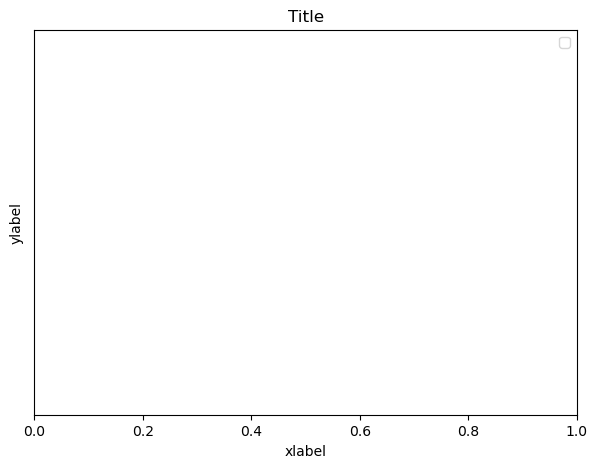

In [49]:
def plot_something():
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    ax.set_title(f"Title")
    ax.set_yticks([])
    ax.set_ylabel("ylabel")
    ax.set_xlabel("xlabel")
    ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None
    
plot_something()